# Previsão de idade x Peso

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv("IdadePeso.csv")

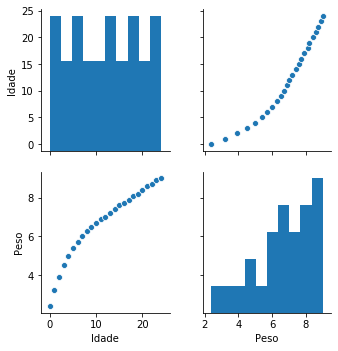

In [117]:
sns.pairplot(df)

In [4]:
df.corr()

,Idade,Peso
Idade,1.000000,0.963564
Peso,0.963564,1.000000


In [13]:
df.describe()

,Idade,Peso
count,25.000000,25.00000
mean,12.000000,6.68800
std,7.359801,1.81023
min,0.000000,2.40000
25%,6.000000,5.70000
50%,12.000000,7.00000
75%,18.000000,8.10000
max,24.000000,9.00000


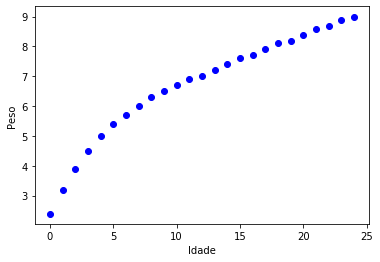

In [8]:
plt.scatter(df['Idade'], df['Peso'], color='blue')
plt.xlabel("Idade")
plt.ylabel("Peso")
plt.show()

/home/bruna_ramos/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Peso')

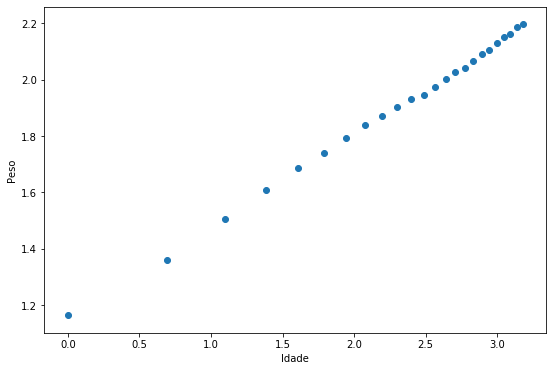

In [12]:
# Aplicando função logaritima para visualizar melhor os dados
figure = plt.figure(figsize=(9,6))
plt.scatter(np.log(df['Idade']), np.log(df['Peso']))
plt.xlabel('Idade')
plt.ylabel('Peso')

In [14]:
#normalizando os dados para aplicar Gradiente

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
col = ['Idade', 'Peso']
new_data = pd.DataFrame(data_scaled, columns=col)
new_data.head()

,Idade,Peso
0,-1.664101,-2.417605
1,-1.525426,-1.966559
2,-1.386750,-1.571894
3,-1.248075,-1.233610
4,-1.109400,-0.951706


Text(0, 0.5, 'Peso')

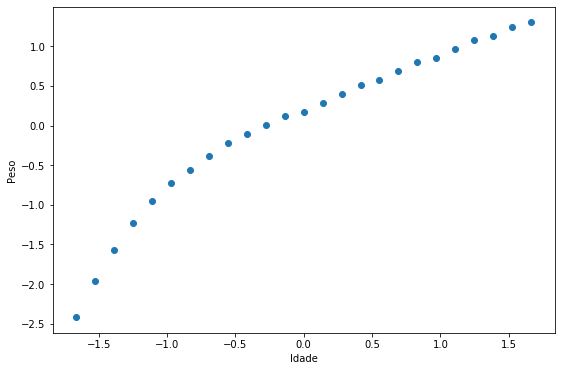

In [22]:
# a curva do grafico mantêm-se a mesma mesmo após normalização
figure = plt.figure(figsize=(9,6))
plt.scatter(new_data['Idade'], new_data['Peso'])
plt.xlabel('Idade')
plt.ylabel('Peso')

In [136]:
#Batch Gradiente

learning_rate = 0.1 
interations = 1000 # número de iterações
theta = np.array([0,0])
theta

array([0, 0])

In [142]:
#Iterando sobre o gradiente

feature = new_data['Idade'].values
y = new_data['Peso'].values
m = len(y)

x0 = np.ones(m)

for interation in range(interations):
    gradients = 2/m * X.T.dot(X.dot(theta) - y)
    theta = theta - learning_rate * gradients


In [17]:
#O primeiro valor do array é a interceptação e o segundo valor é o coeficiente. 
#Basicamente, nosso modelo de Regressão Linear Simples será calculado com base neles.
theta

array([1.37667655e-16, 9.63564072e-01])

In [19]:
# Com a Regressao do SKLearn

from sklearn.linear_model import LinearRegression
X_new = feature.reshape((m,1))
ln = LinearRegression()
ln.fit(X_new, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
ln.coef_[0]

0.9635640719723129

In [27]:
ln.intercept_

1.4243216320177942e-16

In [118]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred_zero = X.dot(theta)
y_pred = ln.predict(X_new)
rmse_zero = np.sqrt(mean_squared_error(y, y_pred_zero))
rmse = np.sqrt(mean_squared_error(y, y_pred))

#MSE Score perto de 0 é um bom modelo, pois é o quanto de erro medio eu tenho
print('Regressão Linear do zero,rmse: ', rmse_zero)
print('Regressão Linear usando sklearnrmse: ', rmse)
# Valor de R2 perto de 1 nos diz que é um bom modelo, é o qto o modelo explica os dados. (0-1)
print('Regressão Linear do zero,r2 score: ', r2_score(y, y_pred_zero))
print('Regressão Linear usando r2 score: ',r2_score(y, y_pred))

Regressão Linear do zero,rmse:  0.2674776237447424
Regressão Linear usando sklearnrmse:  0.2674776237447424
Regressão Linear do zero,r2 score:  0.928455720795866
Regressão Linear usando r2 score:  0.928455720795866


Text(0, 0.5, 'Peso')

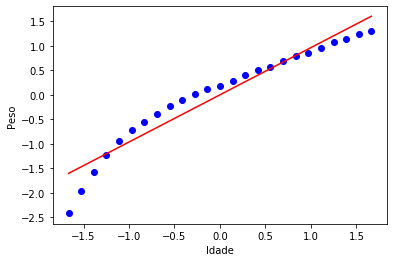

In [109]:
plt.scatter(new_data.Idade,new_data.Peso,  color='blue')
plt.plot(X_new, ln.coef_[0]*X_new + ln.intercept_, '-r')
plt.xlabel("Idade")
plt.ylabel("Peso")